# Formula One Constructors Data Science Prep Course Capstone Project
### Prepared by Brian McGuckin

### Introduction
Formula One racing is considered by many to be the pinnacle of motorsport. Sanctioned by the by the Fédération Internationale de l'Automobile (FIA) since 1950, this single seat, open wheel racing series attracts the best racing drivers and teams in the world.

While much of the focus in Formula One (F1) is on the drivers, it is very much a team effort. For this project I will be focusing on the team aspect of F1. Something to note is that for this project I will be using the terms 'team' and 'constructor' interchangeably. Prior to 1981, the constructors were allowed to sell car chassis to various F1 teams, and thus the terms were separate. In 1981 a rule change was introduced that required each team to construct it's own chassis, and ever since the two terms effectively have the same meaning.

### The Dataset
The dataset I am using (link below) consists of thirteen different csv files each pertaining to a different aspect of F1 racing. The dataset consists of data from the innagural 1950 season up through the 2017 F1 season, and has been collected by Ergast Developer API, a web service which provides historical record keeping of motor racing data and is in the public domain.

Formula 1 Race Data: https://www.kaggle.com/cjgdev/formula-1-race-data-19502017

This project uses the following csv's:
results.csv is an 18 column, 23,777 row csv containing race results F1 races. 
constructors.csv
constructorResults.csv

### The Analysis
In this project I will be asking and answering questions to determine constructor participation, performance, and ultimately success in their Formula One racing programs.

In [127]:
aa= pd.read_csv('results.csv')
len(aa)

23777

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1) Which F1 constructors have participated in the most races?

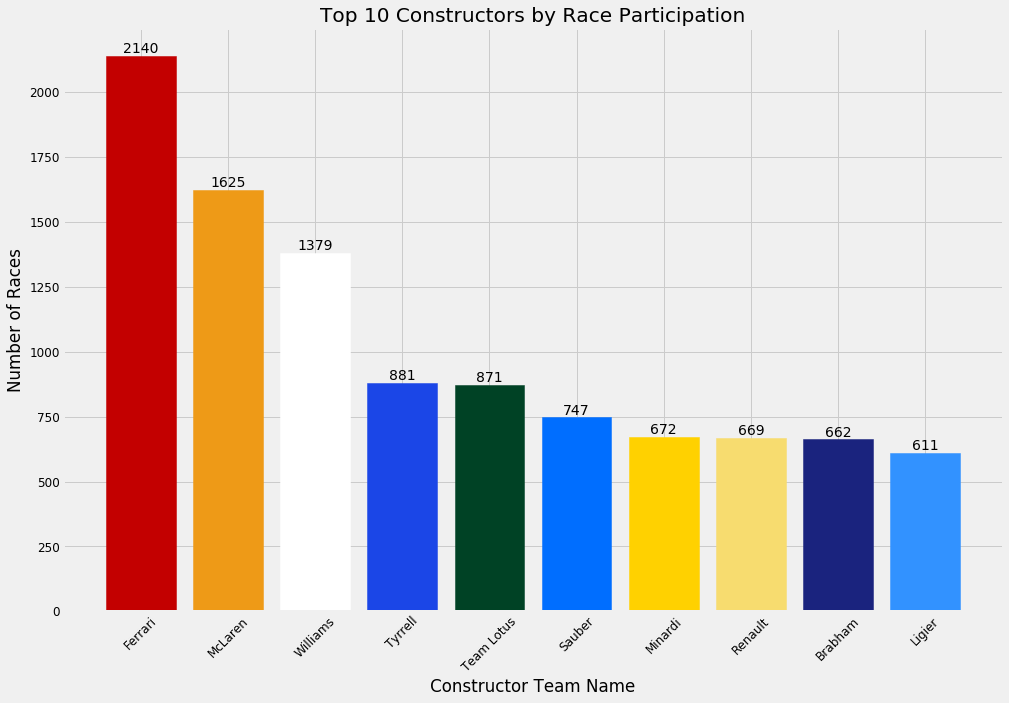

In [89]:
#access results data
results = pd.read_csv('results.csv')

#get a count for races entered and set a dataframe
active_cons = pd.DataFrame(results.constructorId.value_counts())
active_cons.rename(columns = {'constructorId':'numRaces'}, inplace = True)

#join this with the constructors dataset so we know which id belongs to which team
constructors = pd.read_csv('constructors.csv')
join_cons_res = constructors.set_index('constructorId').join(active_cons, lsuffix = 'cons', rsuffix = 'res')
join_cons_res = join_cons_res.sort_values('numRaces', ascending = False)

#chart dataframe
x_races = join_cons_res.head(10)['name']
y_races = join_cons_res.head(10)['numRaces']
numRaces_values = [] #initiate an empty list to put bar values into

for value in join_cons_res.head(10)['numRaces']: #loop to populate list
    numRaces_values.append(value)

numRaces_values = [int(i) for i in numRaces_values] #convert to ints to drop decimal places

#team color hex codes for better looking bars
ferrari = '#C30000'
mclaren = '#ee9a17'
williams = '#FFFFFF'
tyrrell = '#1b46e7'
team_lotus = '#004225'
sauber = '#006EFF'
minardi = '#ffd100'
renault = '#f7dc6f'
brabham = '#1a237e'
ligier = '#3292ff'
    
plt.style.use('fivethirtyeight')

plt.figure(figsize = (15,10))
plt_numRaces = plt.bar(range(len(x_races)), y_races)

plt_numRaces[0].set_color(ferrari)
plt_numRaces[1].set_color(mclaren)
plt_numRaces[2].set_color(williams)
plt_numRaces[3].set_color(tyrrell)
plt_numRaces[4].set_color(team_lotus)
plt_numRaces[5].set_color(sauber)
plt_numRaces[6].set_color(minardi)
plt_numRaces[7].set_color(renault)
plt_numRaces[8].set_color(brabham)
plt_numRaces[9].set_color(ligier)

rects = plt_numRaces.patches

for rect, value in zip(rects, numRaces_values): #loop to add values to bars
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, value, ha='center', va='bottom')

plt.xticks(range(len(x_races)), join_cons_res.head(10)['name'], fontsize = 12, rotation = 45)
plt.yticks(fontsize = 12)
plt.ylabel('Number of Races')
plt.xlabel('Constructor Team Name')
plt.title('Top 10 Constructors by Race Participation')

The results here shouldn't suprise anyone with some historic knowledge of F1, Ferrari is the only constructor to have competed in every single F1 season since 1950. McLaren and Williams are also notoriously prolific constructors, however, any F1 fan worth their salt is familiar with every team represented in this top 10.

Note: These race totals are counts for every car entered into a race by their respective constructor. Most often constructors enter 2 cars per race (and this is now in fact bound by the rules), but at different points in history teams were able to enter more than 2 cars per race and would occasionally field 3rd and even 4th cars.

### 2) How do wins look from a statistical perspective in F1?

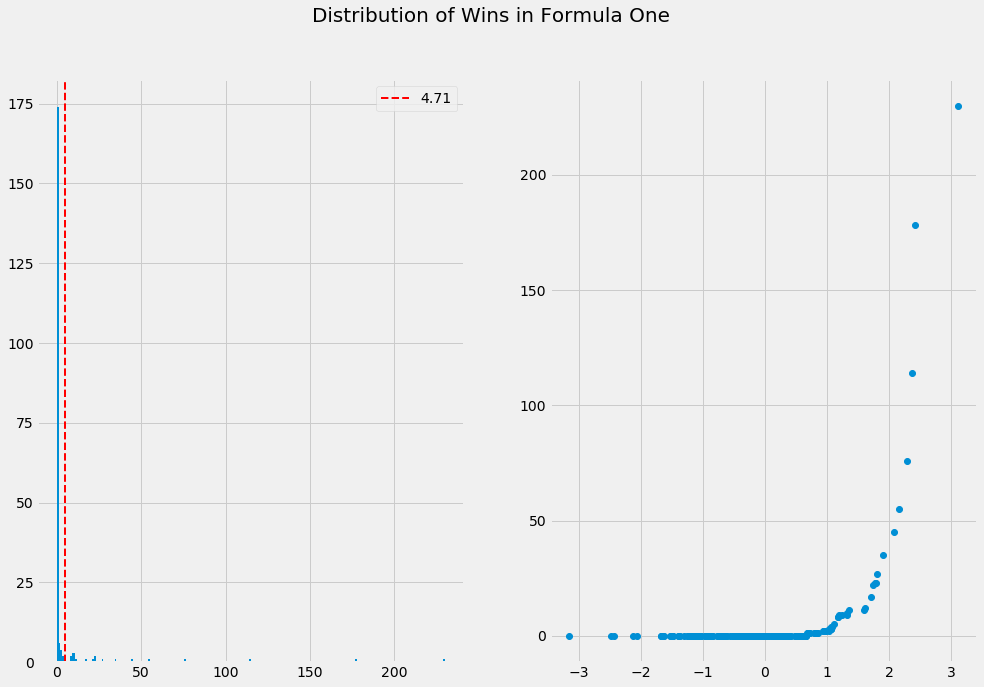

Mode = 0    0.0
dtype: float64


In [90]:
#use the loc and lambda methods to extract out race winners
cons_wins = results.loc[lambda df: results['positionOrder'] == 1, :]
cons_wins = pd.DataFrame(cons_wins.constructorId.value_counts())
cons_wins.rename(columns = {'constructorId':'numWins'}, inplace = True)

#put wins in working dataframe
join_cons_wins = join_cons_res.join(cons_wins)
join_cons_wins['numWins'].fillna(0, inplace=True)

#get mean and round it
mean_wins = join_cons_wins['numWins'].mean()
mean_wins = round(mean_wins,2)

#get mode
mode_wins = join_cons_wins['numWins'].mode()

plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,10))
plt.suptitle('Distribution of Wins in Formula One', fontsize = 20)

plt.subplot(1,2,1)
plt.hist(join_cons_wins['numWins'], bins = len(join_cons_wins))
plt.axvline(mean_wins, color = 'r', linestyle = 'dashed', linewidth = 2, label = mean_wins)
plt.legend()

plt.subplot(1,2,2)
numWins = join_cons_wins['numWins']
numWins = numWins.sort_values(ascending = True)
norm = np.random.normal(0,1,len(join_cons_wins))
norm.sort()
plt.plot(norm, numWins, 'o')

plt.show()
print('Mode = {}'.format(mode_wins))

Win distribution in F1 is far from normal, as this heavily skewed data shows. It more closely follows a Pareto Distribution with a small number of teams holding the majority of the wins. For descriptive purposes I've included the average of 4.71 wins per team which is clearly affected by outliers, as the mode is 0 and the overwhelming majority of teams have not won a single race.

### 3) How do race totals compare to the constructors' win totals?

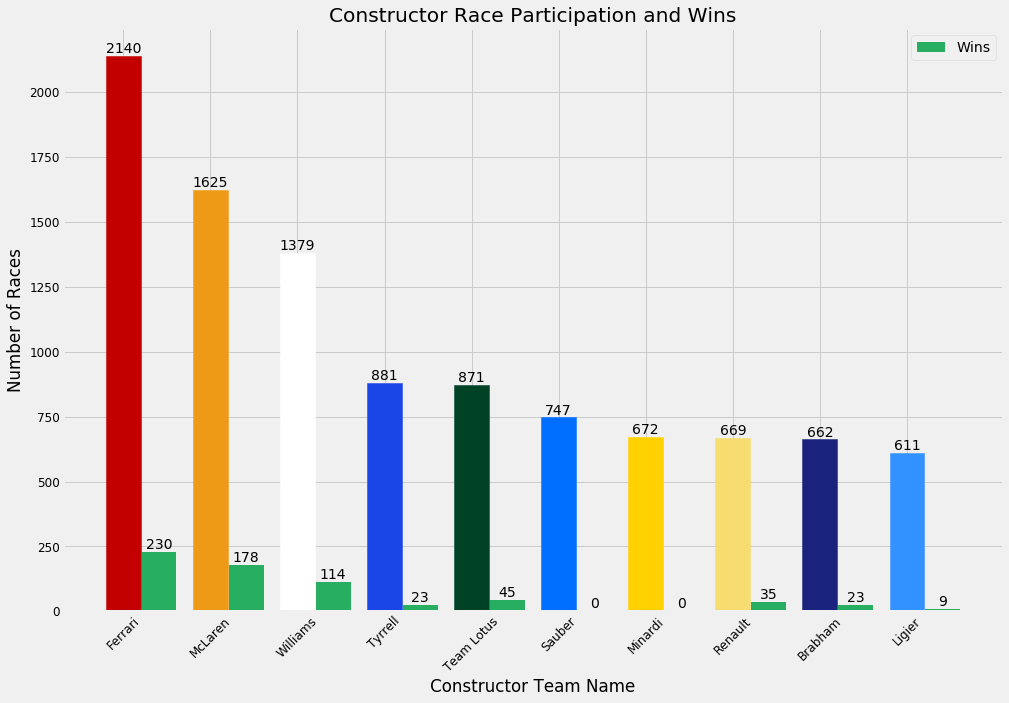

In [91]:
x_wins = range(len(join_cons_wins.head(10)['name']))
y_wins = join_cons_wins.head(10)['numWins']
n = 10
ind = np.arange(n)

numRaces_values = [] #initiate an empty list to put bar values into
for value in join_cons_res.head(10)['numRaces']: #loop to populate list
    numRaces_values.append(value)
numRaces_values = [int(i) for i in numRaces_values] #convert to ints to drop decimal places

numWins_values = []
for value in join_cons_wins.head(10)['numWins']:
    numWins_values.append(value)

a = np.array([numWins_values], dtype=np.float)
b = np.array([numRaces_values], dtype=np.float)
wins_div_races = np.array((a/b)*100)
#print(wins_div_races)
    
plt.figure(figsize = (15,10))
plt.style.use('fivethirtyeight')
width = 0.4

rects1 = plt.bar(ind, y_races, width)
rects2 = plt.bar(ind + width + 0.01, y_wins, width, color = '#27ae60')
#plt.xlim(xmax=10)
#plt.plot([wins_div_races])

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2, height, '%d' % int(height), ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

rects1[0].set_color(ferrari)
rects1[1].set_color(mclaren)
rects1[2].set_color(williams)
rects1[3].set_color(tyrrell)
rects1[4].set_color(team_lotus)
rects1[5].set_color(sauber)
rects1[6].set_color(minardi)
rects1[7].set_color(renault)
rects1[8].set_color(brabham)
rects1[9].set_color(ligier)

plt.xticks(range(len(x_wins)), join_cons_wins.head(10)['name'], fontsize = 12, rotation = 45)
plt.yticks(fontsize = 12)
plt.xlabel('Constructor Team Name')
plt.ylabel('Number of Races')
plt.legend(rects2[:1], ['Wins'])
plt.title('Constructor Race Participation and Wins')
plt.show()

Here we see a visualization of how many races each top 10 team has won compared to the number of races they've entered. While one might think that the more races a team has entered, the better chance they have at racking up wins, we can see here this isn't always the case. Sauber and Minardi for example have earned their reputations as "second rate" teams having both competed in plenty of races without registering a single victory. 

In [92]:
wins_div_races = pd.DataFrame(wins_div_races)
#wins_div_races = ['10.74']
#plt.plot(x_wins, [wins_div_races])
#plt.xlim(max=10)
#plt.show()

### 4) What are the top 10 F1 constructors by proportion of races won?

Here we are stepping back out of our 10 most active teams and referring to the entire results dataset

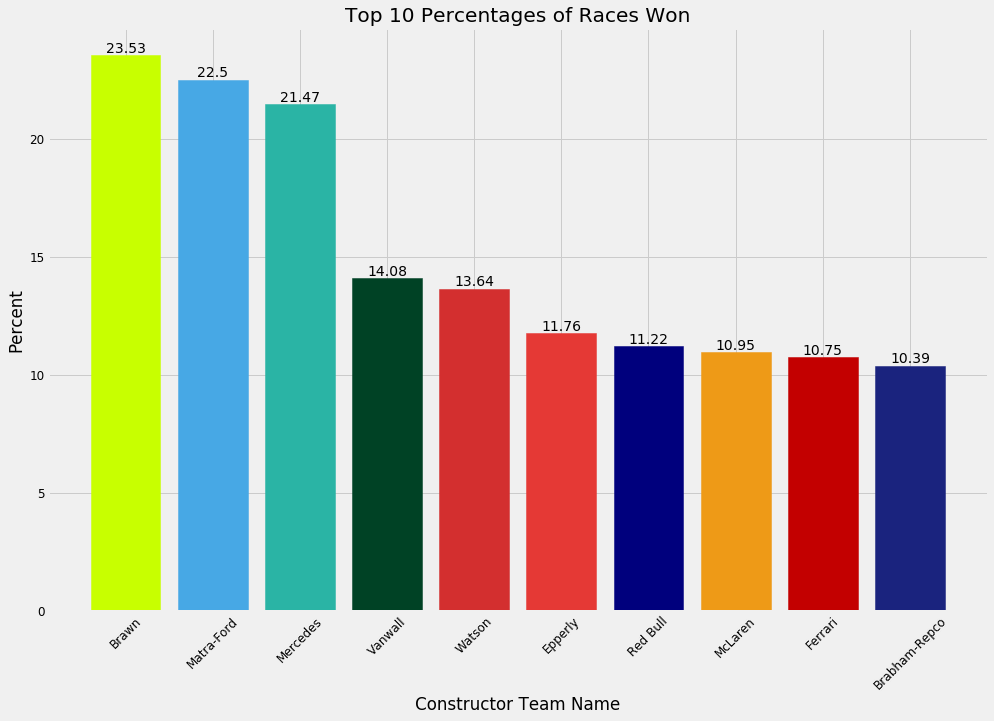

In [93]:
win_pct = pd.DataFrame((join_cons_wins['numWins'] / join_cons_wins['numRaces']) * 100)
win_pct = join_cons_wins.join(win_pct) #join with our working dataframe
win_pct.rename(columns = {0: 'winPercentage'}, inplace = True)
win_pct = win_pct.dropna(subset = ['winPercentage']) #drop teams that haven't won
win_pct = win_pct.round(decimals = 2) #round columns
win_pct = win_pct.sort_values('winPercentage', ascending = False) #sort by win percentage

x_win_pct = win_pct.head(10)['name']
y_win_pct = win_pct.head(10)['winPercentage']
win_values = [] #initiate an empty list to put values into

for value in win_pct.head(10)['winPercentage']: #loop to populate list
    win_values.append(value)

#set some new colors
red_bull = '#00007D'
epperly =  '#e53935'
watson = '#d32f2f'
vanwall = '#004225'
matra = '#47a8e5'
brawn = '#C8FF00'
mercedes = '#2AB4A5'
    
plt.style.use('fivethirtyeight')

plt.figure(figsize = (15,10))
plt_win_pct = plt.bar(range(len(x_win_pct)), y_win_pct)

plt_win_pct[0].set_color(brawn)
plt_win_pct[1].set_color(matra)
plt_win_pct[2].set_color(mercedes)
plt_win_pct[3].set_color(vanwall)
plt_win_pct[4].set_color(watson)
plt_win_pct[5].set_color(epperly)
plt_win_pct[6].set_color(red_bull)
plt_win_pct[7].set_color(mclaren)
plt_win_pct[8].set_color(ferrari)
plt_win_pct[9].set_color(brabham)

rects = plt_win_pct.patches

for rect, value in zip(rects, win_values): #loop to add values to bars
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, value, ha='center', va='bottom')

plt.xticks(range(len(x_win_pct)), win_pct['name'], fontsize = 12, rotation = 45)
plt.xlabel('Constructor Team Name')
plt.yticks(fontsize = 12)
plt.ylabel('Percent')
plt.title('Top 10 Percentages of Races Won')

plt.show()

Here we have some potentially suprising results. We can see that Brawn GP has the highest winning percentage, however it should be noted that they only competed for a single season (2009) and were able to exploit a loophole in the rules resulting in a much faster car than the rest of the field. After the 2009 season, Brawn GP was bought by their engine supplier (Mercedes) and have continued to remain successful as the current iteration of the Mercedes factory team.

We also see some unfamiliar names here in Watson and Epperly. Some investigation shows that these two teams solely in the Indianapolis 500, which at certain points in history was a race in the World Championship. However this is a very specialized race on an oval racetrack, and historically teams specializing in oval racing would enter the Indy 500 and exclude themselves from the rest of the World Championship. This results in these two particularly successful teams' high win percentage.

More on Watson and Epperly: https://en.wikipedia.org/wiki/A._J._Watson, https://en.wikipedia.org/wiki/Quin_Epperly

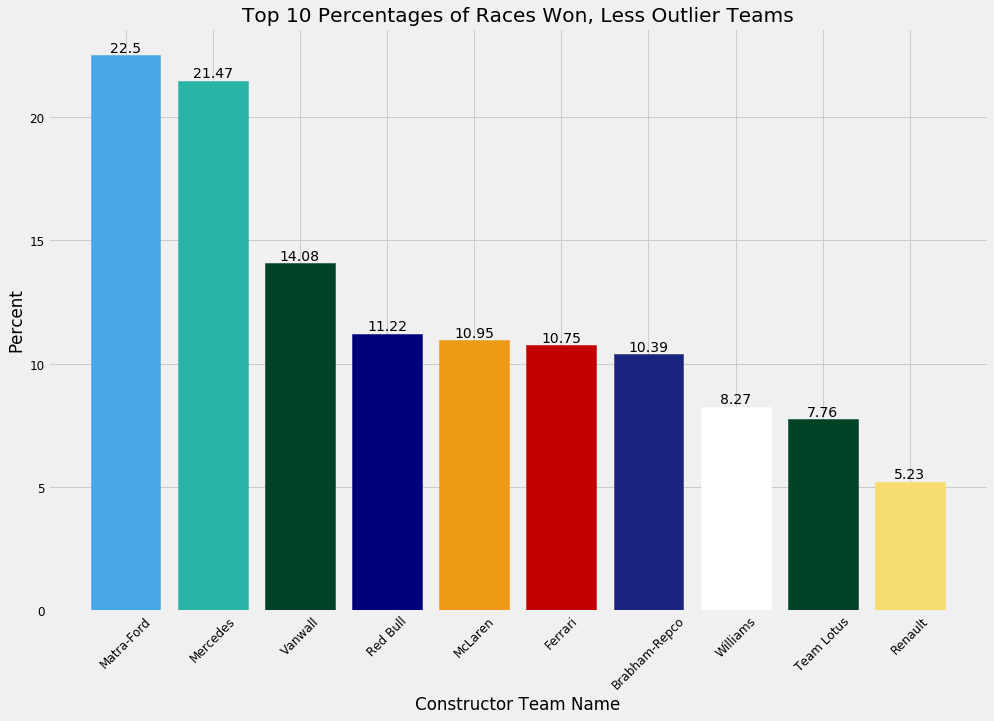

In [122]:
win_pct2 = win_pct[['name', 'winPercentage']].copy() #create custom df
win_pct2 = win_pct2.drop(win_pct2.index[[0,4,5]]) #drop desired rows

lotus_wp = (9.52+8.59+5.17)/3 #combine lotus teams
win_pct3 = win_pct2.drop(win_pct2.index[[8,12]]) #drop desired rows
win_pct3.loc[win_pct3['name'] == 'Lotus-Climax', 'name'] = 'Team Lotus' #format name
win_pct3.loc[win_pct3['name'] == 'Team Lotus', 'winPercentage'] = lotus_wp #update value with new mean
win_pct3 = win_pct3.sort_values('winPercentage', ascending = False) #sort

x_win_pct3 = win_pct3.head(10)['name']
y_win_pct3 = win_pct3.head(10)['winPercentage']
win_values3 = [] #initiate an empty list to put values into

for value in win_pct3.head(10)['winPercentage']: #loop to populate list
    win_values3.append(value)
    
lotus = '#004225'

plt.style.use('fivethirtyeight')

plt.figure(figsize = (15,10))
plt_win_pct3 = plt.bar(range(len(x_win_pct3)), y_win_pct3)

plt_win_pct3[0].set_color(matra)
plt_win_pct3[1].set_color(mercedes)
plt_win_pct3[2].set_color(vanwall)
plt_win_pct3[3].set_color(red_bull)
plt_win_pct3[4].set_color(mclaren)
plt_win_pct3[5].set_color(ferrari)
plt_win_pct3[6].set_color(brabham)
plt_win_pct3[7].set_color(williams)
plt_win_pct3[8].set_color(team_lotus)
plt_win_pct3[9].set_color(renault)

rects = plt_win_pct3.patches

for rect, value in zip(rects, win_values3): #loop to add values to bars
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, value, ha='center', va='bottom')

plt.xticks(range(len(x_win_pct3)), win_pct3['name'], fontsize = 12, rotation = 45)
plt.xlabel('Constructor Team Name')
plt.yticks(fontsize = 12)
plt.ylabel('Percent')
plt.title('Top 10 Percentages of Races Won, Less Outlier Teams')

plt.show()

This is same plot as above, except here Brawn GP, Watson, and Epperly are dropped for some of their outlier characteristics. Brawn GP only participated in one season of the F! championship, and their exemplary performance yet tiny sample size. Watson and Epperly were dropped for similar sample size reasons, and the fact that they only participated in a single, very specialized race which favored their expertise greatly.

### 5) Which constructors have scored the most points?

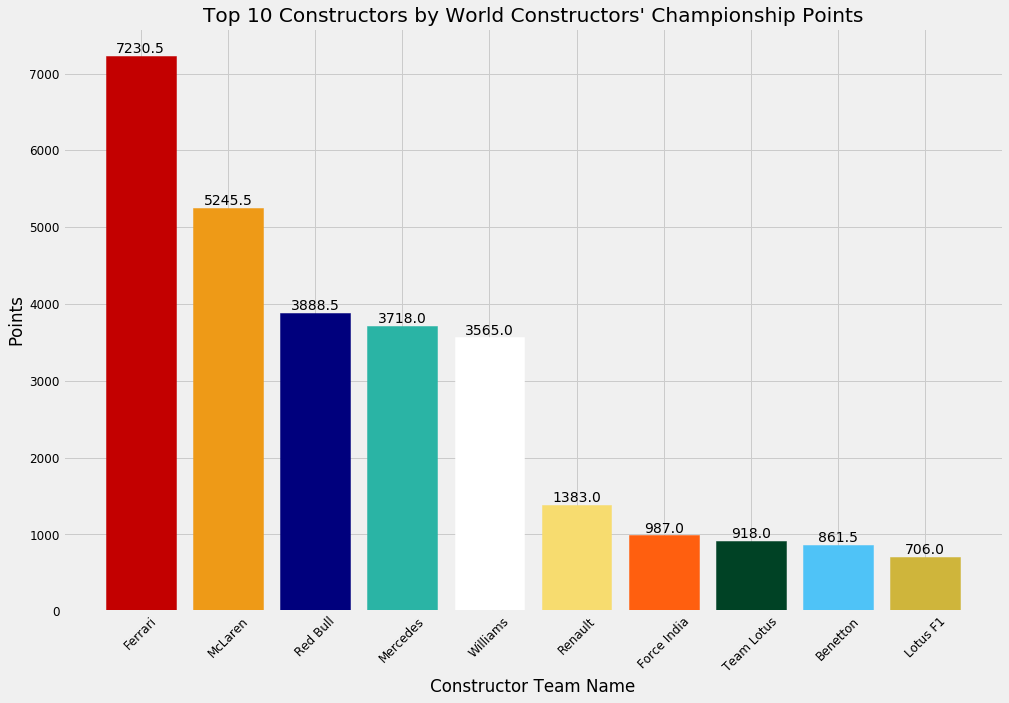

In [102]:
constructor_results = pd.read_csv('constructorResults.csv') #set a df from constructor results dataset
total_points = pd.DataFrame(constructor_results.groupby('constructorId').sum()['points'])
total_points = win_pct.join(total_points) #join with our working df
total_points.rename(columns = {'points':'totalPoints'}, inplace = True)
total_points = total_points.sort_values('totalPoints', ascending = False)

x_points = total_points.head(10)['name']
y_points = total_points.head(10)['totalPoints']
totalPoints_values = [] #initiate an empty list to put values into
   
for value in total_points.head(10)['totalPoints']: #loop to populate list
    totalPoints_values.append(value)

benetton = '#4fc3f7'
force_india = '#FF5F0F'
lotus_f1 = '#cfb53b'
    
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,10))
plt_totalPoints = plt.bar(range(len(x_points)), y_points)

plt_totalPoints[0].set_color(ferrari)
plt_totalPoints[1].set_color(mclaren)
plt_totalPoints[2].set_color(red_bull)
plt_totalPoints[3].set_color(mercedes)
plt_totalPoints[4].set_color(williams)
plt_totalPoints[5].set_color(renault)
plt_totalPoints[6].set_color(force_india)
plt_totalPoints[7].set_color(team_lotus)
plt_totalPoints[8].set_color(benetton)
plt_totalPoints[9].set_color(lotus_f1)

rects = plt_totalPoints.patches

for rect, value in zip(rects, totalPoints_values): #loop to add values to bars
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, value, ha='center', va='bottom')

plt.xticks(range(len(x_points)), total_points.head(25)['name'], fontsize = 12, rotation = 45)
plt.yticks(fontsize = 12)
plt.ylabel('Points')
plt.xlabel('Constructor Team Name')
plt.title('Top 10 Constructors by World Constructors\' Championship Points')

Here again we have a mix of expected and unexpected results. In aggregate, teams that have participated in a large number of races have also registered the most points. However we see team Red Bull in 3rd place, while a relatively young team has enjoyed much success. Force India is another relatively new team that a bit of a suprise here. Not to detract anything from their efforts, simply aggregating points scored is not the most accurate measure here, as the rules regarding which places are awarded points (and how many) have constantly been in a state of flux. If you wish you can read more about the various points structures throughout F1 history here:

https://en.wikipedia.org/wiki/List_of_Formula_One_World_Championship_points_scoring_systems#Points_scoring_systems

A note on how the FIA awards points for suspended races: If a race is suspended and cannot be restarted, full points are awarded as long as 75% of the total race distance has been completed. If less than 75% has been completed, half points are award (this how we get fractional point totals). If less than 2 laps of the race have been completed, no points are awarded.

### 6) Which team is the most efficient at scoring points?

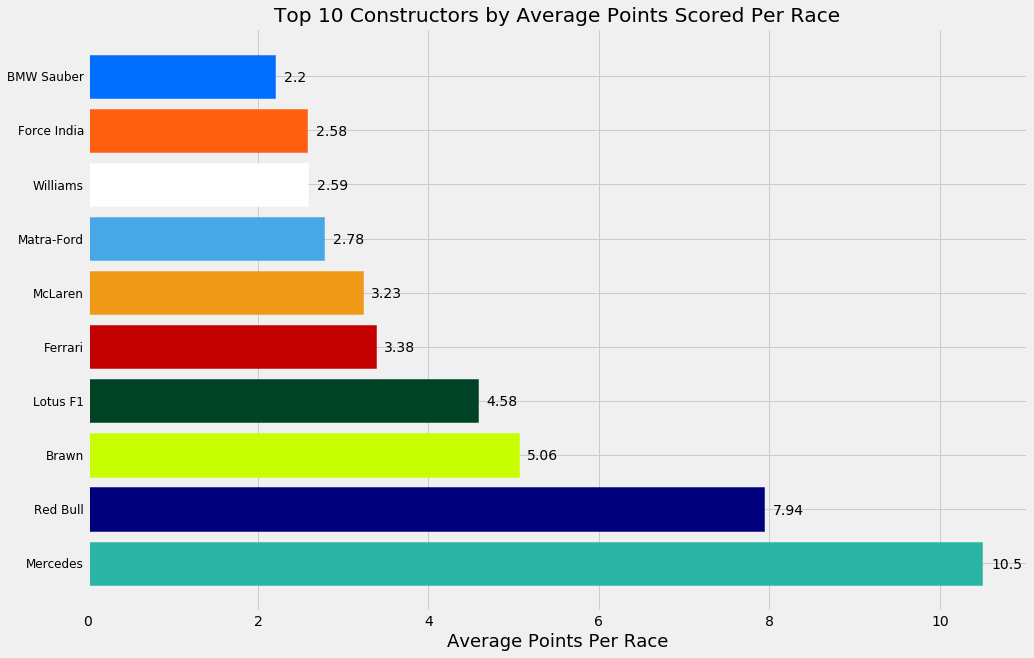

In [99]:
points_per_race = pd.DataFrame(total_points['totalPoints'] / total_points['numRaces'])
points_per_race = total_points.join(points_per_race)
points_per_race.rename(columns = {0:'pointsPerRace'}, inplace = True)
points_per_race = points_per_race.round(decimals = 2) #round columns
points_per_race = points_per_race.sort_values('pointsPerRace', ascending = False)

points_per_race_x = points_per_race.head(10)['name']
points_per_race_y = points_per_race.head(10)['pointsPerRace']
ppr_values = [] #initiate an empty list to put values into
   
for value in points_per_race.head(10)['pointsPerRace']: #loop to populate list
    ppr_values.append(value)

plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,10))
plt_ppr = plt.barh(range(len(points_per_race_x)), points_per_race_y)
plt_ppr[0].set_color(mercedes)
plt_ppr[1].set_color(red_bull)
plt_ppr[2].set_color(brawn)
plt_ppr[3].set_color(lotus)
plt_ppr[4].set_color(ferrari)
plt_ppr[5].set_color(mclaren)
plt_ppr[6].set_color(matra)
plt_ppr[7].set_color(williams)
plt_ppr[8].set_color(force_india)
plt_ppr[9].set_color(sauber)
plt.yticks(range(len(points_per_race_x)), points_per_race.head(10)['name'], fontsize = 12)
plt.xlabel('Average Points Per Race', fontsize = 18)
plt.title('Top 10 Constructors by Average Points Scored Per Race')

for i, v in enumerate(ppr_values):
   plt.text(v + .1, i - .1, str(v), fontsize = 14)

plt.show()

It is clear that Mercedes is by far the most efficient team at scoring points. While their participation in F1 has been on again off again, it is evident that when they do decide to field an F1 team, they do so with great degrees of success. It should also be noted here that while this is a better measure than our aggregations above, one would still expect the results to skew in favor of successful teams that participate in eras where total points awarded per position is on the higher side.

### Conclusion and Further Research
Here I have attempted to delve into some data to provide insights into the success rate of F1 constructors. Among F1 followers, you aren't going to get much argument if you contend that Ferrari, McLaren, and Williams are historically the most successful. Likewise, especially taking the modern era into consideration, Mercedes (incl. Brawn) and Red Bull have enjoyed much success.

Further analysis on this data I would like to perform includes normalizing the points system across different eras to see who was truly the most efficient at scoring points and seeing how that compares to the methods I used here. Additionally, this dataset does not include WCC results by season which would be the ultimate measure of success in F1 from the constructors' perspective. I would like to introduce that data into this analysis in the future.

Delving deeper, I would like to include some analysis broken down by different car formulas. The formula is the incredibly complex ruleset that determines how teams are to build their cars, and controls engine sizes, tires, aerodynamics, car electronics, and everything inbetween. These different rulesets are casually referred to as 'eras' and it would be interesting to see which teams had the most success in the various eras of the F1 formula. 